In [2]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
from IPython.display import HTML
import seaborn as sns
#from plotnine import *
import plotly.figure_factory as ff
import cv2 as cv
from scipy import stats
import rpy2
import folium
import json
import requests
import warnings
from pandas_datareader import data as pdr
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('player_stats.csv')

In [4]:
df.shape

(5682, 41)

In [5]:
df.isnull().sum()

player              0
country             0
height              0
weight              0
age                 0
club                0
ball_control        0
dribbling           0
marking           158
slide_tackle        0
stand_tackle        0
aggression          0
reactions           0
att_position        0
interceptions       0
vision              0
composure           0
crossing            0
short_pass          0
long_pass           0
acceleration        0
stamina             0
strength            0
balance             0
sprint_speed        0
agility             0
jumping             0
heading             0
shot_power          0
finishing           0
long_shots          0
curve               0
fk_acc              0
penalties           0
volleys             0
gk_positioning      0
gk_diving           0
gk_handling         0
gk_kicking          0
gk_reflexes         0
value               0
dtype: int64

### marking열이 전부 의미가 없는 데이터로 이루어져 있어서 결측치를 제거

In [6]:
df=df.dropna(axis=1)

선수 가치 앞에 달러 표시가 있어서 전처리

In [7]:
df = df.assign(value=list(map(lambda x: str(x.replace('$','')),df.value)))

In [8]:
df = df.assign(value=list(map(lambda x: (x.replace('.','')),df.value)))

In [9]:
df['value']=df['value'].astype('float')

중복선수가 있어서 제거

In [10]:
df=df.drop([5675,5678],axis=0)

In [11]:
df=df.drop_duplicates(['player'])

키 몸무게 나이와 fifa에서 측정한 능력치 수치값들의 통계적 수치 파악

In [12]:
df.describe()

,height,weight,age,ball_control,dribbling,slide_tackle,stand_tackle,aggression,reactions,att_position,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
count,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,...,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5655.000000,5.655000e+03
mean,181.669496,75.285411,26.311936,58.901680,56.132980,46.723254,48.818214,56.311760,61.949956,50.717241,...,48.111052,43.310345,48.169938,42.933156,16.179841,16.435013,16.186030,16.071264,16.563572,2.232476e+06
std,6.829772,6.997010,4.727333,16.574533,18.768138,20.527169,20.980397,16.860848,8.880021,19.773733,...,18.080971,17.091507,15.777378,17.912053,17.129906,17.620181,16.976108,16.798259,17.929059,7.245437e+06
min,156.000000,54.000000,17.000000,8.000000,5.000000,7.000000,7.000000,11.000000,32.000000,3.000000,...,7.000000,4.000000,8.000000,4.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000e+02
25%,177.000000,70.000000,23.000000,55.000000,51.000000,27.000000,30.000000,45.000000,56.000000,40.000000,...,36.000000,32.000000,39.000000,30.000000,8.000000,8.000000,8.000000,8.000000,8.000000,3.500000e+04
50%,182.000000,75.000000,26.000000,63.000000,62.000000,54.000000,57.000000,59.000000,62.000000,56.000000,...,50.000000,43.000000,49.000000,44.000000,11.000000,11.000000,11.000000,11.000000,11.000000,7.750000e+04
75%,186.000000,80.000000,30.000000,69.000000,68.000000,64.000000,66.000000,69.000000,68.000000,65.000000,...,62.000000,56.000000,60.000000,57.000000,14.000000,14.000000,14.000000,14.000000,14.000000,1.600000e+06
max,204.000000,102.000000,41.000000,94.000000,95.000000,87.000000,91.000000,96.000000,93.000000,93.000000,...,93.000000,94.000000,92.000000,90.000000,90.000000,90.000000,87.000000,90.000000,89.000000,1.535000e+08


선수 데이터 수 : 5680명
키 평균 : 대략 181
몸무게 : 평균 75kg
나이 평균 : 26세
선수 가치 : 27000000달러

In [13]:
df.describe(include='object')

,player,country,club
count,5655,5655,5655
unique,5655,135,688
top,Cristian Castro Devenish,England,River Plate
freq,1,514,21


잉글랜드 선수가 제일 많은 것으로 나타났고, river plate 선수가 제일 많이 있다.

In [16]:
df1=df.query("country=='Korea Republic'|country=='Japan'")

In [17]:
korea=df1.query("country=='Korea Republic'")

In [18]:
japan=df1.query("country=='Japan'")

### 한국 선수들의 키와 가치의 상관관계를 알아보기

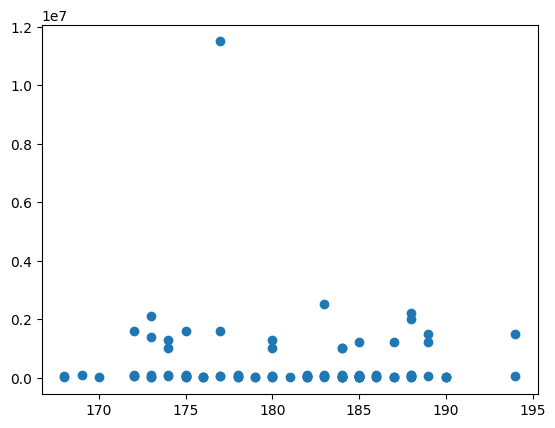

In [19]:
plt.plot(korea['height'],korea['value'],'o')

이상치 하나가 있다는 것을 알 수 있어서 이상치를 제거하고 다시 그려보겠습니다.

In [20]:
korea1=korea[korea['value']!=korea['value'].max()]

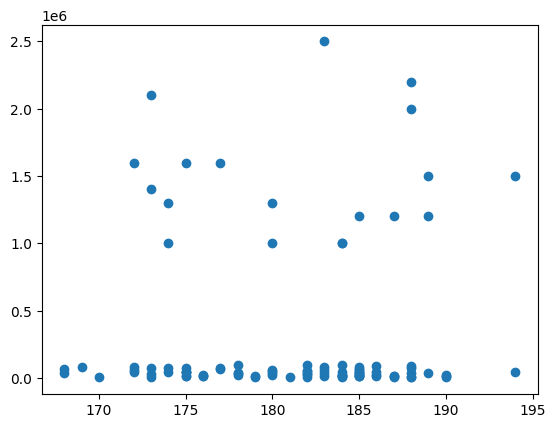

In [21]:
plt.plot(korea1['height'],korea1['value'],'o')

이상치가 있어도 value의 차이가 커서 나누어서 그래프를 그려보겠습니다.

In [22]:
k1,k2=korea1[korea1['value']>=1000000],korea[korea['value']<1000000]

<AxesSubplot:xlabel='height', ylabel='value'>

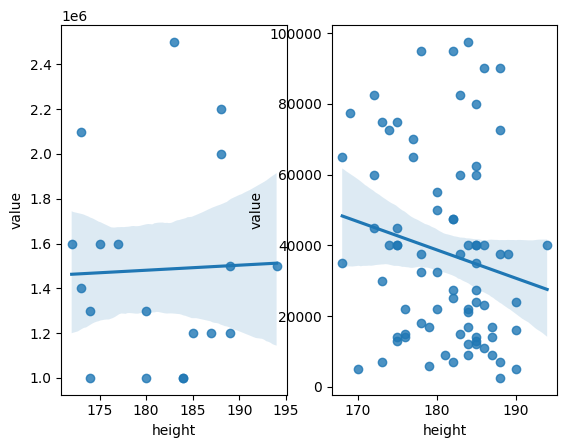

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2)
sns.regplot(data=k1,x=k1['height'],y=k1['value'],marker='o',ax=ax1)
sns.regplot(data=k2,x=k2['height'],y=k2['value'],marker='o',ax=ax2)

100000 이상인 선수들은 대체적으로 키와 가치가 크게 관련 없는 것으로 보이고
100000 미만인 선수들은 키가 크면 가치가 떨어지는 경향을 확인 할 수 있었다.

### 일본선수들의 키와 가치의 상관관계 알아보기

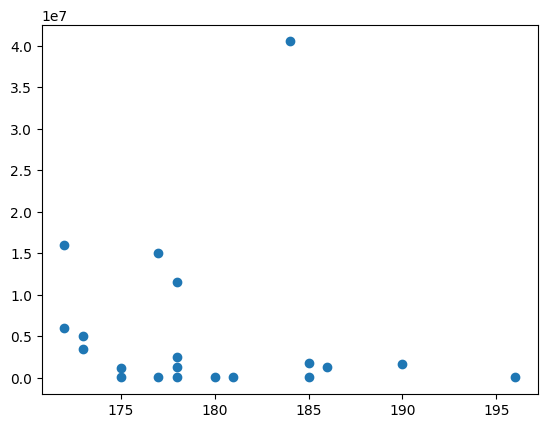

In [24]:
plt.plot(japan['height'],japan['value'],'o')

<AxesSubplot:xlabel='height', ylabel='value'>

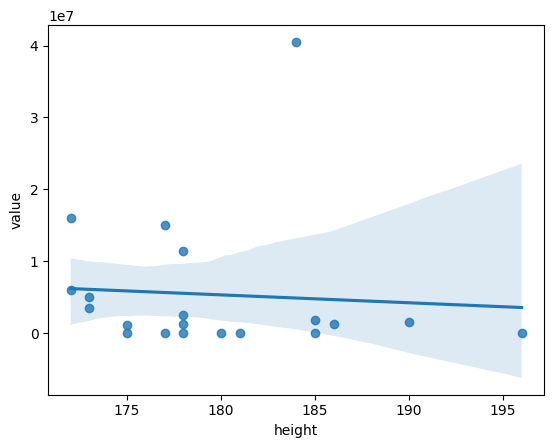

In [25]:
sns.regplot(data=japan,x=japan['height'],y=japan['value'],marker='o')

이상치가 있어서 선형회귀가 정확하지 않은 것 같아 이상치를 제거하고 다시 그려보겠습니다.

In [26]:
j1=japan[japan['value']!=japan['value'].max()]

<AxesSubplot:xlabel='height', ylabel='value'>

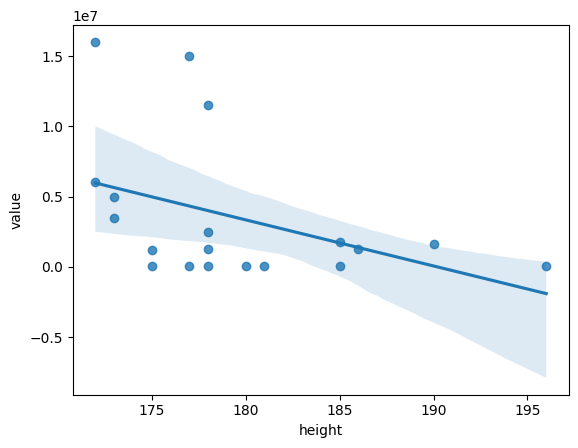

In [27]:
sns.regplot(data=j1,x=j1['height'],y=j1['value'],marker='o')

이상치를 제거하고 다시 그려본 결과 키가 커질수록 가치는 하락하는 경향을 보인다.

선수가치 평균을 기준으로 상위 15개 국가들의 선수들의 가치를 그려보겠습니다.

In [28]:
top15=list(df.groupby('country').agg(np.mean).sort_values('value',ascending=False).reset_index()['country'])[0:20]
t15=df[df['country'].isin(top15)]
t15

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
1,Silaldo Taffarel,Brazil,181,80,31,Corinthians,69,70,56,58,...,65,62,48,46,12,15,14,8,14,97500.0
4,Diego Segovia,Uruguay,191,80,23,Independiente,14,8,14,16,...,9,10,16,5,61,59,62,64,64,30000.0
5,Cláudio Ramos,Portugal,183,83,31,FC Porto,20,16,13,17,...,15,13,13,10,72,78,73,64,74,2800000.0
7,Pedro Gomes,Portugal,185,75,20,Boavista FC,41,33,65,70,...,26,26,39,25,7,6,12,13,11,23000.0
8,Famara Diédhiou,Senegal,189,80,30,Granada CF,68,67,16,22,...,53,39,72,63,11,7,10,15,12,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5673,Rodri,Spain,191,82,27,Manchester City,85,78,78,86,...,65,61,46,59,14,10,10,7,8,77000000.0
5676,Karim Benzema,France,185,81,35,Real Madrid,91,87,18,24,...,82,73,84,88,5,13,11,5,7,64000000.0
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,41,43,...,84,69,86,83,11,14,14,9,14,99500000.0
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,29,32,...,88,87,91,86,15,9,9,15,11,99500000.0


<AxesSubplot:xlabel='country', ylabel='value'>

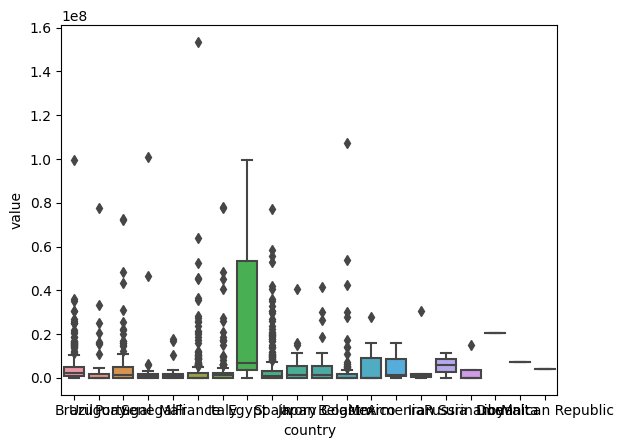

In [29]:
sns.boxplot(data=t15, x=t15['country'], y=t15['value'])

이상치가 많아서 각각의 나라별로 비교해야 데이터 분석에 용이함을 알 수 있었다 

선수 가치 순 상위 20명의 데이터를 뽑았다

In [30]:
pl20=list(df.sort_values('value',ascending=False).reset_index()['player'])[0:20]
p20=df[df['player'].isin(pl20)]

In [31]:
p20.sort_values('value',ascending=False)

,player,country,height,weight,age,club,ball_control,dribbling,slide_tackle,stand_tackle,...,curve,fk_acc,penalties,volleys,gk_positioning,gk_diving,gk_handling,gk_kicking,gk_reflexes,value
5229,Kylian Mbappé,France,182,73,24,Paris SG,91,93,32,34,...,80,69,84,83,11,13,5,7,6,153500000.0
1965,Erling Haaland,Norway,195,94,23,Manchester City,82,78,29,53,...,77,62,79,88,11,7,14,13,7,123000000.0
4849,Kevin De Bruyne,Belgium,181,75,32,Manchester City,90,86,53,66,...,89,83,83,83,10,15,13,5,13,107500000.0
916,Sadio Mané,Senegal,174,69,31,FC Bayern München,86,88,38,42,...,77,64,75,75,7,10,10,15,14,101000000.0
5677,Mohamed Salah,Egypt,175,71,31,Liverpool,86,88,41,43,...,84,69,86,83,11,14,14,9,14,99500000.0
5679,Neymar Jr,Brazil,175,68,31,Paris SG,94,95,29,32,...,88,87,91,86,15,9,9,15,11,99500000.0
5136,Joshua Kimmich,Germany,177,75,28,FC Bayern München,85,82,78,85,...,85,73,44,69,15,8,15,7,15,97000000.0
4211,Virgil van Dijk,Netherlands,193,92,32,Liverpool,76,70,86,91,...,60,70,62,45,11,13,10,13,11,84500000.0
3416,Lautaro Martínez,Argentina,174,72,26,Inter,86,84,44,31,...,78,54,74,90,8,11,8,8,13,79500000.0
2458,Gianluigi Donnarumma,Italy,196,90,24,Paris SG,30,28,16,14,...,12,14,24,8,85,90,83,79,89,78000000.0


<AxesSubplot:xlabel='country', ylabel='count'>

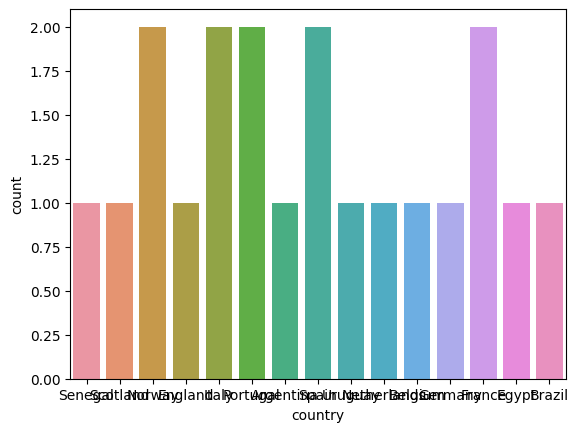

In [32]:
sns.countplot(x='country', data=p20)

상위 20명의 선수들의 국가분포를 알아보았다. 스페인 이탈리아 포르투칼등 5개 국으로 나타났다.

<AxesSubplot:xlabel='age', ylabel='Count'>

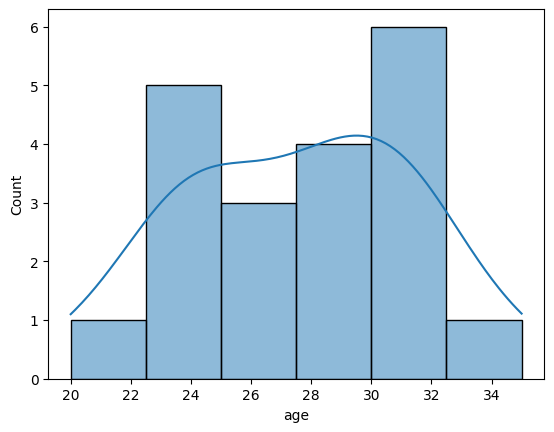

In [33]:
sns.histplot(p20['age'],kde=True)

상위 20선수들의 나이분포를 보아 평균 26~28세로 볼 수 있다.

In [38]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(penalty='none')
model1.fit(np.reshape(p20['height'],(1,-1)),p20['weight'])

ValueError: Length of values (1) does not match length of index (20)

In [ ]:
model = LinearRegression()
model.fit()